In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

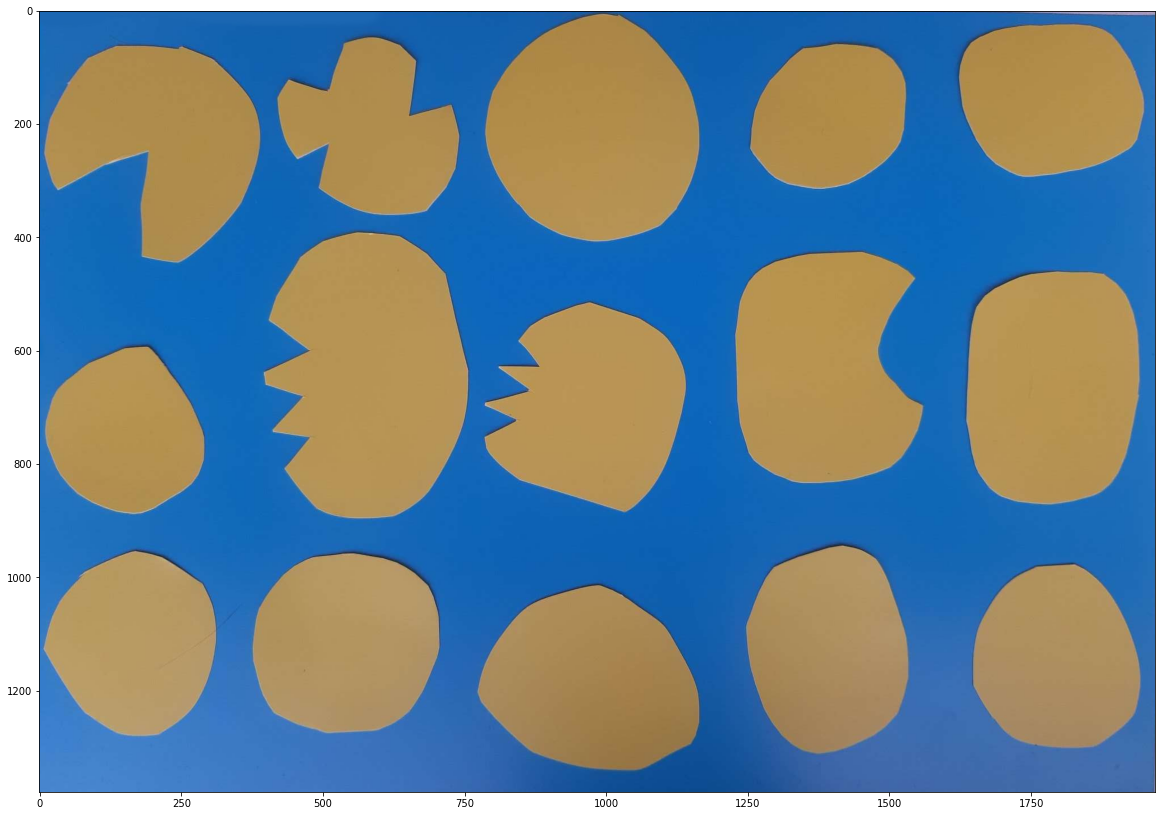

In [27]:
potata_img = cv2.imread('./potata_easy1.jpeg')
potata_img = cv2.transpose(potata_img)

potata_img = cv2.cvtColor(potata_img, cv2.COLOR_BGR2RGB)[51:-100, 20:-50]

plt.figure(figsize = (20,40))
plt.imshow(np.array(potata_img)) 

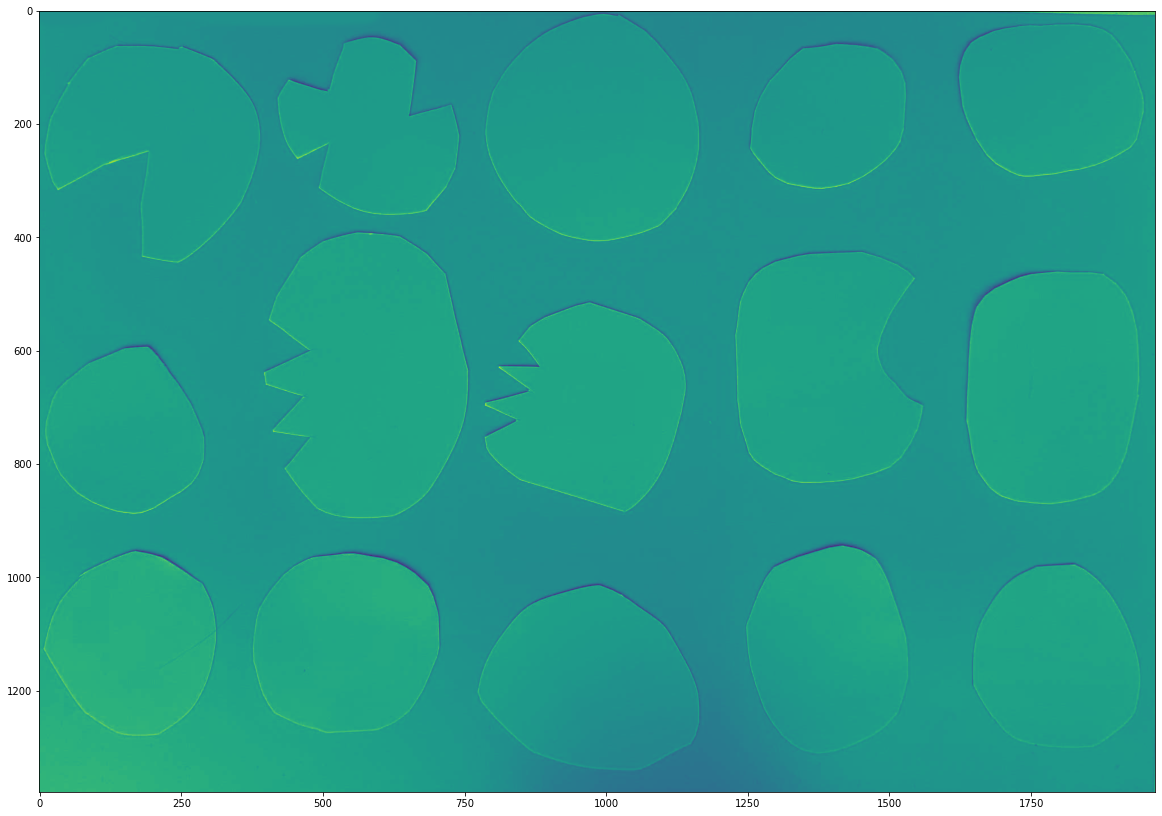

In [28]:
graypic = cv2.cvtColor(potata_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (20,40))
plt.imshow(np.array(graypic)) 

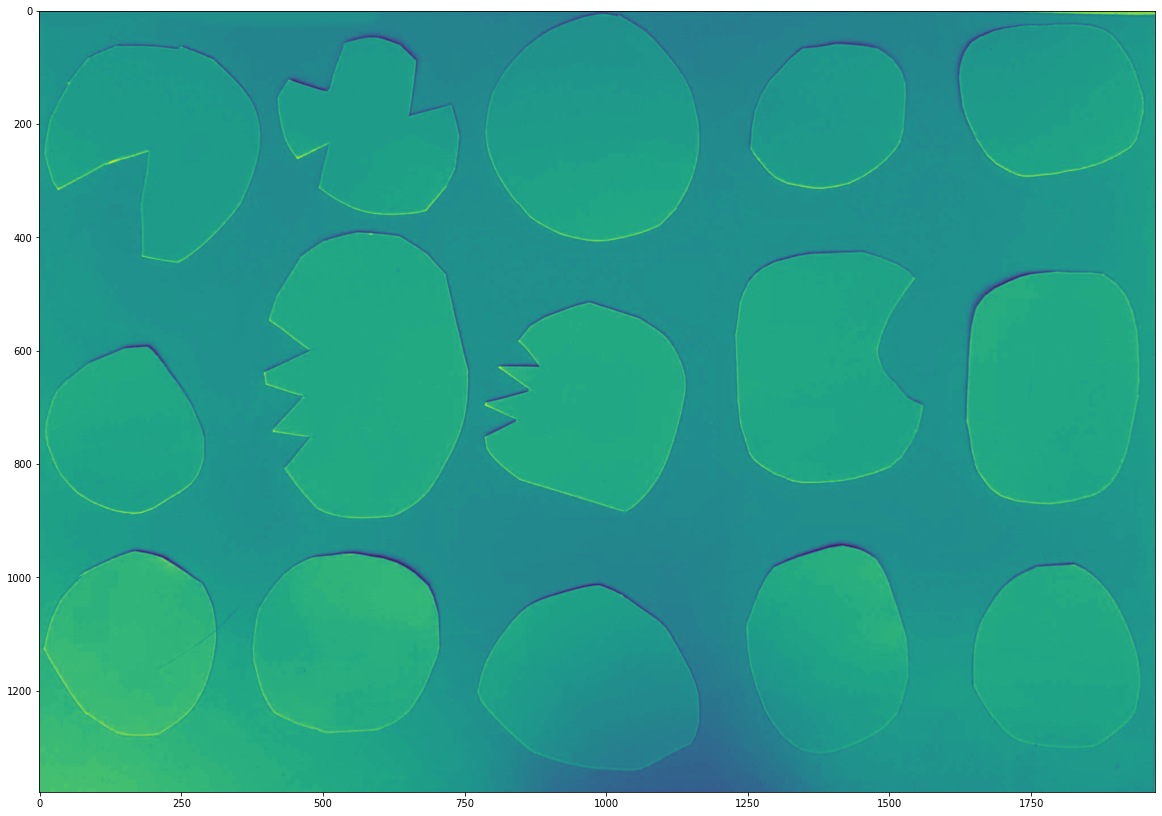

In [40]:
f1 = 3
gauss_blur_1 = cv2.GaussianBlur(graypic, (f1,f1), 0)

plt.figure(figsize = (20,40))
plt.imshow(np.array(gauss_blur_1)) 

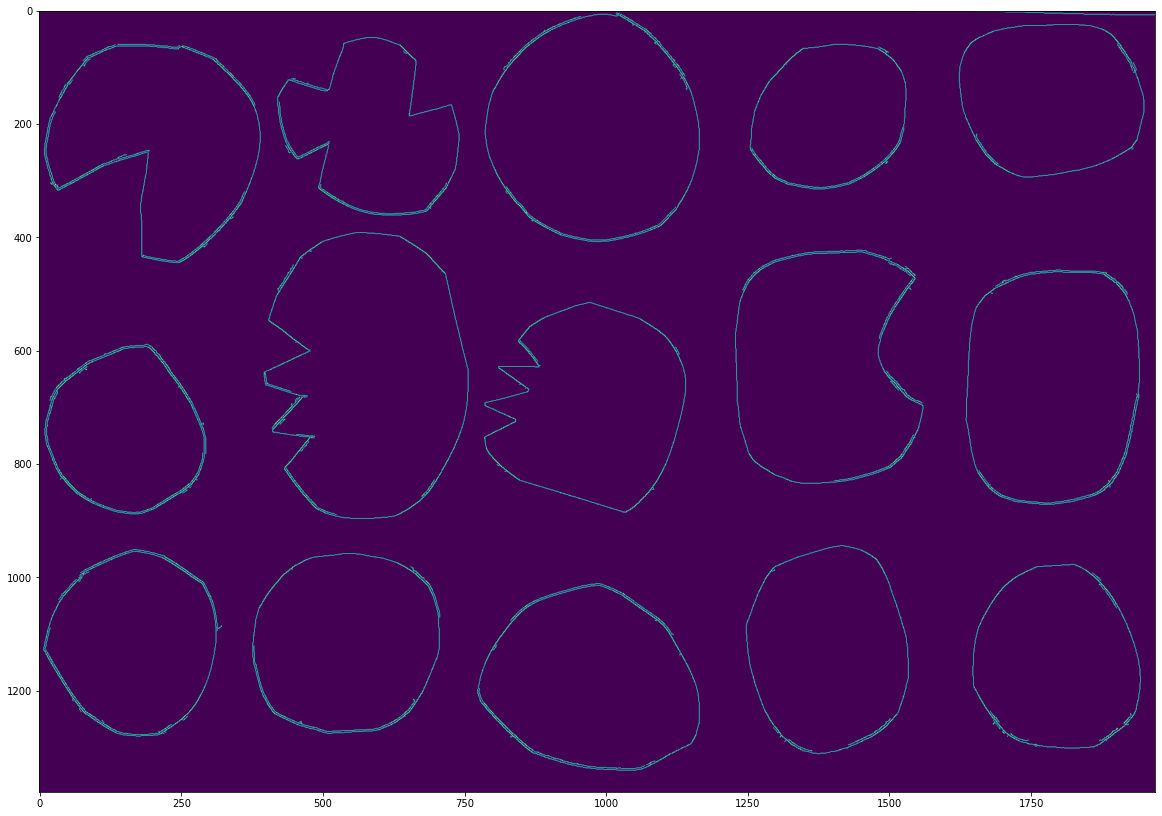

In [41]:
canny = cv2.Canny(gauss_blur_1, 20, 200)

plt.figure(figsize = (20,40))
plt.imshow(np.array(canny))

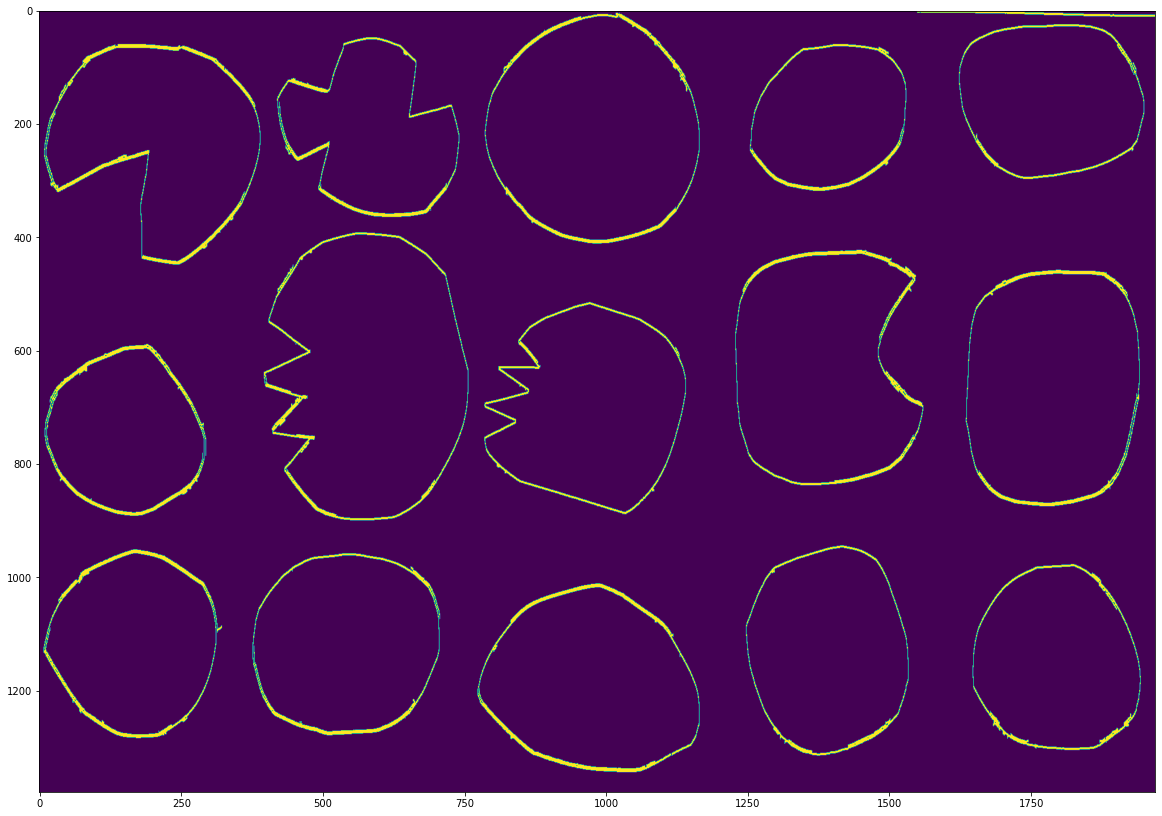

In [54]:
f2 = 11
dil = cv2.dilate(canny,(f2,f2),iterations = 3)

plt.figure(figsize = (20,40))
plt.imshow(np.array(dil))

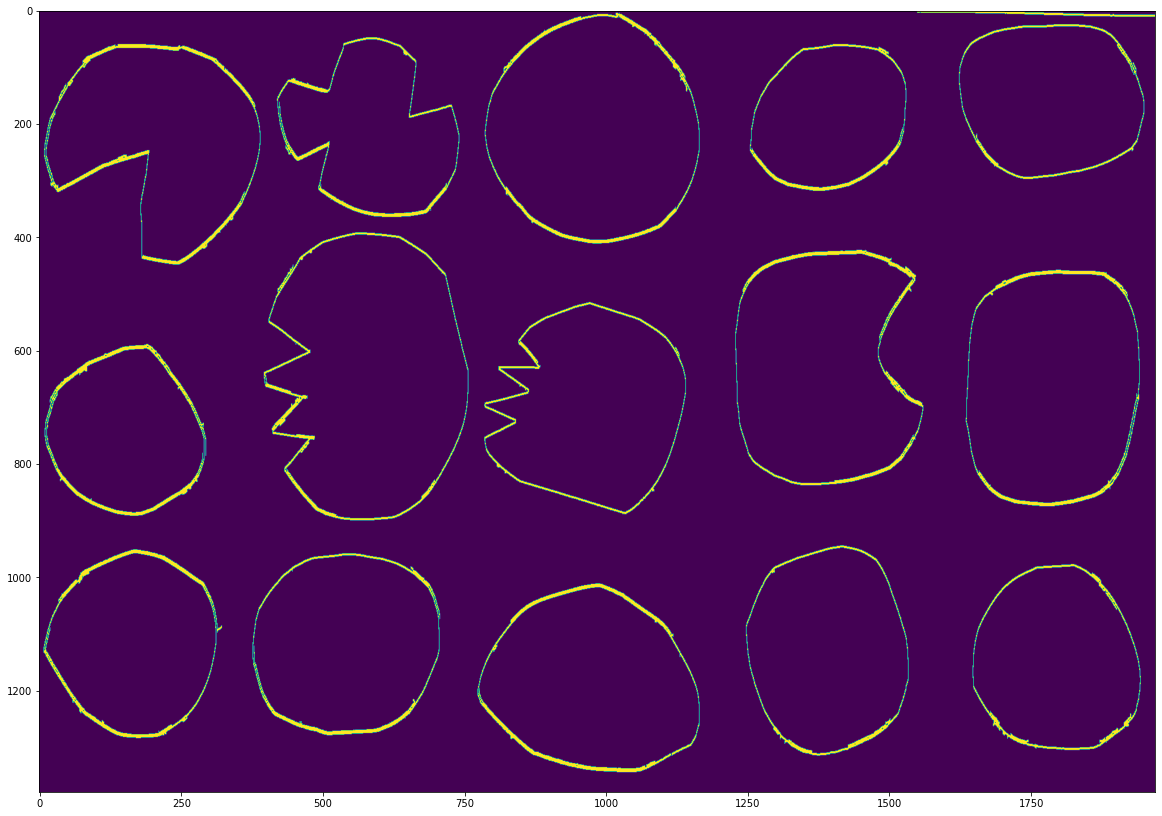

In [55]:
ret, thresh = cv2.threshold(dil, 220, 255, 0)

plt.figure(figsize = (20,40))
plt.imshow(np.array(thresh))

In [60]:
contours, hierarchy = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
)

In [61]:
len(contours)

16

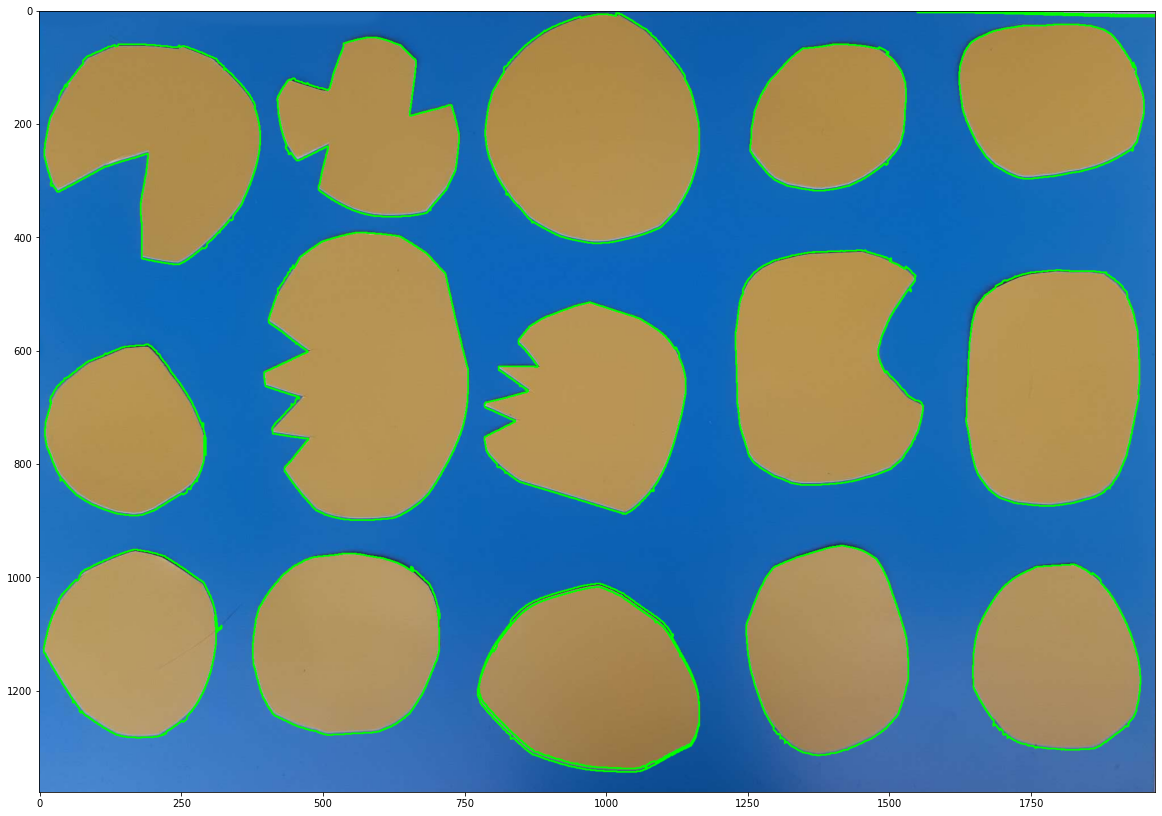

In [63]:
img = potata_img.copy()

cv2.drawContours(img, contours, -1, (0,255,0), 2)

plt.figure(figsize = (20,40))
plt.imshow(np.array(img))

In [64]:
hulls = [cv2.convexHull(contour) for contour in contours]
cv2.drawContours(img, hulls, -1, (255,0,0), 2)

array([[[ 27, 103, 179],
        [ 27, 103, 179],
        [ 27, 103, 179],
        ...,
        [172, 153, 181],
        [172, 152, 180],
        [176, 151, 180]],

       [[ 27, 103, 179],
        [ 27, 103, 179],
        [ 27, 103, 179],
        ...,
        [173, 153, 180],
        [174, 151, 179],
        [176, 151, 180]],

       [[ 27, 103, 179],
        [ 27, 103, 179],
        [ 27, 103, 179],
        ...,
        [172, 154, 180],
        [173, 153, 181],
        [176, 153, 182]],

       ...,

       [[ 71, 133, 206],
        [ 71, 133, 206],
        [ 71, 133, 206],
        ...,
        [ 71,  93, 142],
        [103, 116, 161],
        [126, 131, 173]],

       [[ 71, 133, 206],
        [ 71, 133, 206],
        [ 71, 133, 206],
        ...,
        [ 71,  93, 142],
        [103, 116, 161],
        [126, 131, 173]],

       [[ 71, 133, 206],
        [ 71, 133, 206],
        [ 71, 133, 206],
        ...,
        [ 72,  94, 143],
        [102, 115, 160],
        [125, 130, 172]]

In [65]:
len(hulls)

16

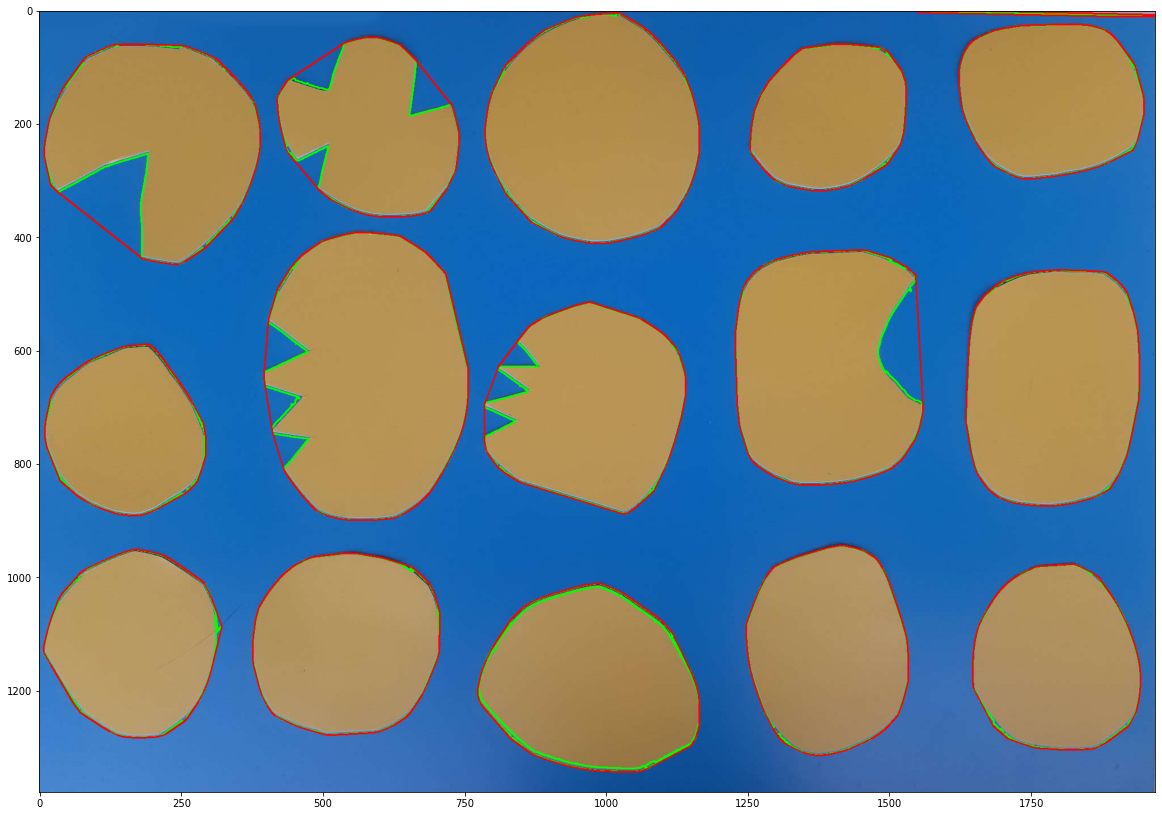

In [67]:
plt.figure(figsize = (20,40))
plt.imshow(np.array(img))

In [70]:
[cv2.contourArea(hulls[j]) for j in range(len(hulls))]

[97359.0,
 77497.0,
 87070.0,
 76956.0,
 83443.5,
 64305.0,
 99469.5,
 110789.0,
 120624.0,
 147930.0,
 57271.5,
 111631.5,
 75899.0,
 73330.5,
 119377.5,
 1972.0]

In [71]:
[cv2.contourArea(contours[j]) for j in range(len(contours))]

[4833.0,
 76722.5,
 86459.5,
 75814.0,
 82891.5,
 63394.5,
 93702.5,
 110076.5,
 109945.5,
 140011.0,
 56783.5,
 96320.0,
 66952.5,
 72779.0,
 118553.5,
 1257.0]

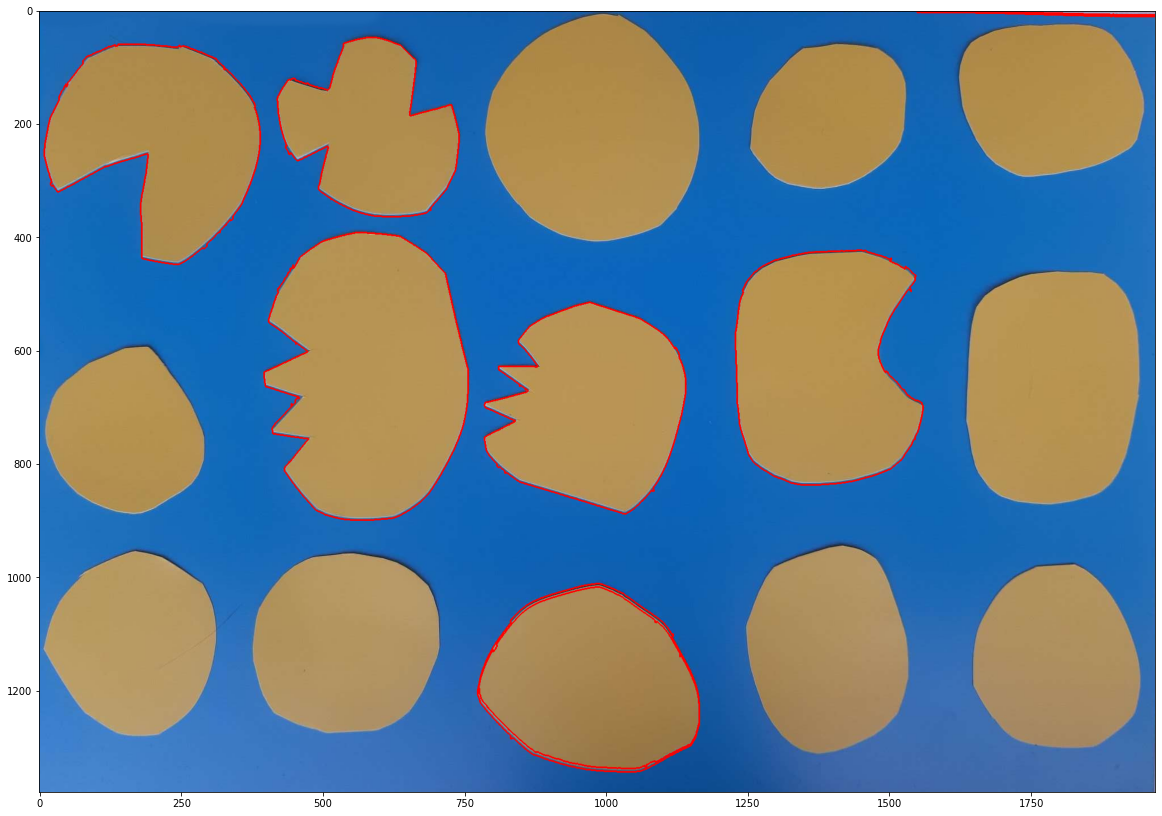

In [73]:
eps = 0.02

img = potata_img.copy()
for c, h in zip(contours, hulls):
    ar_cont = cv2.contourArea(c)
    ar_hull = cv2.contourArea(h)
    if ar_cont/ar_hull < 1 - eps:
        cv2.drawContours(img, c, -1, (255,0,0), 2)

plt.figure(figsize = (20,40))
plt.imshow(np.array(img))